In [3]:
import numpy as np 
import matplotlib.pyplot as plt

#datas
length =[40,50,60,70]
weight =[10,20,30,18]

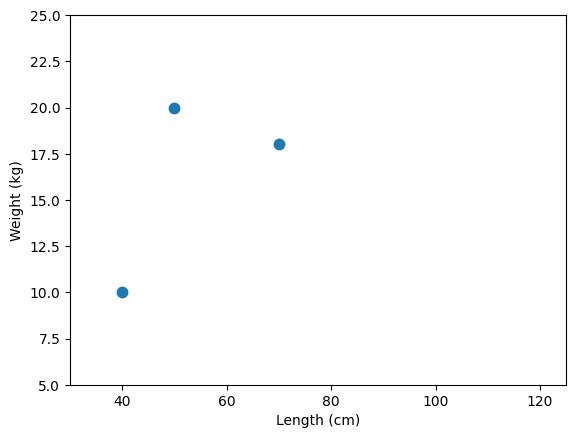

In [4]:
#plotting
fig , ax = plt.subplots ()
ax.plot(length, weight, '.', ms=15)
ax.set(xlabel='Length (cm)', ylabel='Weight (kg)',
       xlim=[30, 125], ylim=[5, 25]);

In [5]:
#fit linear to the data 
a, b = np.polyfit(length, weight, 1)

#predict the weight of a new observation (a new dog)
new_length = 62
pred_weight = a * new_length + b 
print('Predicted weight for a new data point, weight is {:1.2f}.'.format(pred_weight))


Predicted weight for a new data point, weight is 21.88.


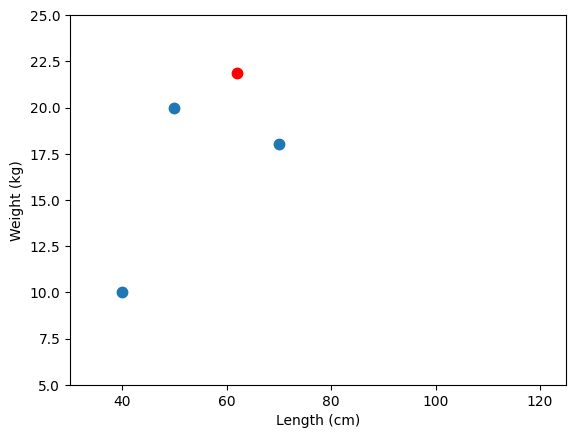

In [6]:
# We can check how our prediction fits in with the data we observed
ax.plot(new_length, pred_weight, '.r', ms=15)
fig

In [7]:
# If we also happen to now the true weight of our test data, we can check how good our prediction is
actual_weight = 14.7
error = actual_weight - pred_weight

print('The (absolute) error of our prediction is {:1.2f} kilograms.'.format(error))

The (absolute) error of our prediction is -7.18 kilograms.
